In [49]:
#Input of experimental data
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
#from impedance.preprocessing import readGamry



# Z_exp = open("Exp-data.DTA")
# print(Z_exp.read())

# f,Z_exp2= readGamry("1PVDF_K_0_0131_top16mm_A.DTA")
# print(Z_exp2)
# print(f)


filename = "Trial-16mm-30th-1.DTA"

with open(filename, 'r', encoding='ISO-8859-1') as input_file:
        lines = input_file.readlines()
        
for count,line in enumerate(lines):
    if "ZCURVE" in line:
         start_line = count+3
raw_data = lines[start_line:]

freq_exp, ReZ_exp, ImZ_exp =[], [], []

for line in raw_data:
        # line = line.replace(",", ".")
        each_line = line.split()
        freq_exp.append(float(each_line[2]))
        ReZ_exp.append(float(each_line[3]))
        ImZ_exp.append(float(each_line[4]))
num_freq =45
freq_exp =np.array(freq_exp[:num_freq])  
ReZ_exp =np.array(ReZ_exp[:num_freq]) 
ImZ_exp =np.array(ImZ_exp[:num_freq]) 
Exp_data=ReZ_exp+1j*ImZ_exp
# Exp_data = np.array([ReZ_exp, ImZ_exp])
print(len(freq_exp))
print(len(Exp_data)) 

45
45



Circuit string: R0-CPE1
Fit: True

Initial guesses:
     R0 = 1.00e+00 [Ohm]
  CPE1_0 = 1.00e+00 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 1.63e+01  (+/- 6.24e-01) [Ohm]
  CPE1_0 = 4.28e-05  (+/- 2.26e-07) [Ohm^-1 sec^a]
  CPE1_1 = 7.72e-01  (+/- 1.16e-03) []

[ 16.4886114 -4.25745129e-01j  16.51949992-5.08429868e-01j
  16.55650696-6.07493133e-01j  16.60069292-7.25773463e-01j
  16.65347709-8.67070151e-01j  16.71620787-1.03499266e+00j
  16.79151244-1.23657365e+00j  16.88108658-1.47635252e+00j
  16.98886102-1.76485135e+00j  17.11579152-2.10462855e+00j
  17.27077003-2.51948680e+00j  17.45442961-3.01112070e+00j
  17.66677786-3.57955064e+00j  17.92857172-4.28034033e+00j
  18.23792146-5.10843124e+00j  18.62019881-6.13174028e+00j
  19.07341147-7.34493439e+00j  19.59531643-8.74200925e+00j
  20.23563982-1.04560755e+01j  20.9834038 -1.24577470e+01j
  21.87241852-1.48375291e+01j  23.02752619-1.79296091e+01j
  24.26989705-2.12552819e+01j  25.86722255-2.55311241e+01j
  27.68

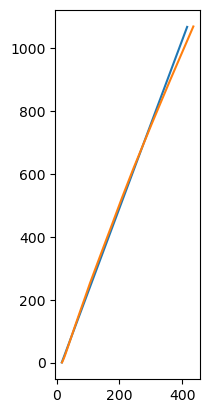

In [50]:

from impedance.models.circuits import CustomCircuit

# circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
circuits = 'R0-CPE1'
p0 = [1, 1, 1]

c1 = CustomCircuit(circuits, initial_guess=p0)

Fitted_parameters=c1.fit(freq_exp, Exp_data)
print(Fitted_parameters)

Z_fit = c1.predict(freq_exp)
print(Z_fit)

fig, ax=plt.subplots()
ax.plot(np.real(Z_fit),-np.imag(Z_fit))
ax.plot(ReZ_exp,-ImZ_exp)
ax.set_aspect("equal")

In [35]:
#RQ fitting
from scipy.optimize import  curve_fit


def objective(freq_exp,R_f,alp,Q_f):
    
    omega = 2*np.pi*freq_exp
 
    Impedance_rq = R_f + 1/(((1j*omega)**alp)*Q_f)
    return  np.array([np.real(Impedance_rq), np.imag(Impedance_rq)])
    # return Impedance_rq
   

# initial guess for parameters
print(Exp_data)
p0 = [1, 1, 1]
out = objective(freq_exp,1,1,1)
print(out)
# minimize the objective function subject to the nonlinear constraint
popt = curve_fit(objective,freq_exp,Exp_data,p0)
# popt = curve_fit(objective,freq_exp,Exp_data,p0)

# print(popt)



[[ 9.21244    9.22065    9.234065   9.244827   9.267422   9.288642
   9.313749   9.341902   9.381062   9.427297 ]
 [-0.1567999 -0.2007839 -0.251331  -0.3143792 -0.3851152 -0.4693317
  -0.5779714 -0.7075415 -0.8630435 -1.052169 ]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-7.95712650e-07 -1.00126983e-06 -1.26078900e-06 -1.58733347e-06
  -1.99841391e-06 -2.51317966e-06 -3.16431045e-06 -3.98042893e-06
  -5.01522144e-06 -6.29926675e-06]]


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=2

In [ ]:
# To get solutions of characteristic equations
import scipy
from sympy import *

lam = Symbol("lambda")
sol =0  
NN = 10 # No of solutions of the equation
solutions = [0]  # First solution

for i in range(1,NN):
    sol = nsolve(besselj(1,lam),sol+3,prec= 5)
    solutions.append(sol)

Lam = np.array(solutions)
print(Lam)

In [4]:
#Maths fitting
import numpy as np
import scipy

from scipy.optimize import minimize, NonlinearConstraint,curve_fit
from scipy.special import jv

def objective(x):
    
    t= dist = 120*1e-6
    K_pure =0.131
    rb=16e-3/2
    rtop=16e-3/2
    
    phis_bottom = 1
    phis_top = 0
    
    # omega = 2*np.pi*freq_exp
    # Nm_f = round(x[0],4)
    # alp = round(x[1],4)
    # C_f = round(x[2]/1e5,6)
    Nm_f = x[0]
    alp = x[1]
    C_f = x[2]
    print(Nm_f, alp, C_f)
    Keff = K_pure/Nm_f
    xi=rtop/rb
    yt = t/rb

    #Maths impedance calculation

    #Frequency independent terms
    # BC3 term
    L_A = np.zeros((NN,NN),dtype =np.complex_)
    #print(L_A)
    m=0
    for m in range(0,NN):
        L_A[m,m] = Keff*(jv(0,float(Lam[m]))**2)/(2*rb)
    # print(L_A)

    #BC4 term
    LL_A = np.zeros((NN,NN),dtype =np.complex_)
    LL_B = np.zeros((NN,NN),dtype =np.complex_)

    m=0
    for m in range(0,NN):
        LL_A[m,m] = Keff*cosh(Lam[m]*yt)*(jv(0,float(Lam[m]))**2)/(2*rb)
        LL_B[m,m] = Keff*Lam[m]*sinh(Lam[m]*yt)*(jv(0,float(Lam[m]))**2)/(2*rb)

    # print(LL_A)
    # print(LL_B)

    #Freq dependant terms
    fr =0
    Impedance_math = np.zeros(len(freq_exp),dtype=np.complex_)
    for  fr in range(len(freq_exp)):  
        omega = 2*np.pi*freq_exp[fr]
        S = (1j*omega)**alp
        #print(S)
        b = np.zeros((NN,NN),dtype=np.complex_)
        m=0
        for m in range(0,NN):
            b[m,m] = C_f*S*(jv(0,float(Lam[m]))**2)/2
        #print(b)
            
        R= np.zeros((NN,1),dtype=np.complex_)
        R[0] = C_f*S*phis_bottom/2
        #print(R)

        #BC4 terms
        PP_A = np.zeros((NN,NN),dtype=np.complex_)
        PP_B = np.zeros((NN,NN),dtype=np.complex_ )
        m=0
        for m in range(0,NN):
            if m==0:
                PP_A[0,0] = C_f*S*(xi**2)*yt/2
                
                PP_B[0,0] = C_f*S*(xi**2)/2
            else:
                
                PP_A[m,0] = C_f*S*yt*xi*jv(1,float(Lam[m])*xi)/Lam[m]
                PP_B[m,0] = C_f*S*xi*jv(1,float(Lam[m])*xi)/Lam[m]
        #print(PP_A)
        #For other elements of PP matrix
        m=n=0
        for m in range(0,NN):
            for n in range(1,NN):
                if m==n:
                    PP_A[m,n] = C_f*S*(sinh(Lam[n]*yt)/Lam[n])*((xi**2)/2)*jv(0,float(Lam[m])*xi)**2 + jv(1,float(Lam[m])*xi)**2
                    PP_B[m,n] = C_f*S*(cosh(Lam[n]*yt))*((xi**2)/2)*jv(0,float(Lam[m])*xi)**2 + jv(1,float(Lam[m])*xi)**2

                else:
                    PP_A[m,n] = C_f*S*(sinh(Lam[n]*yt)/Lam[n])*(xi/(Lam[m]**2 - Lam[n]**2))*(jv(1,float(Lam[m])*xi)*jv(0,float(Lam[n])*xi)*Lam[m] - jv(0,float(Lam[m])*xi)*jv(1,float(Lam[n])*xi)*Lam[n])
                    PP_B[m,n] = C_f*S*cosh(Lam[n]*yt)*(xi/(Lam[m]**2 - Lam[n]**2))*(jv(1,float(Lam[m])*xi)*jv(0,float(Lam[n])*xi)*Lam[m] - jv(0,float(Lam[m])*xi)*jv(1,float(Lam[n])*xi)*Lam[n])  

        
        #print(PP_B)  
        Alpha = LL_A + PP_A
        Delta = LL_B + PP_B
        #print((Alpha))
        Gamma = np.linalg.inv(Alpha)*Delta
        B = np.linalg.inv(b + L_A*Gamma)*R
        shi = -Gamma*B
        # print(shi)
        # print(B)
        Impedance_math[fr] = (phis_bottom-phis_top)/(-np.pi*Keff*shi[0,0]*rb)
        #print(Impedance_math)

        # print(Impedance_rq)
    # mod_weight = (np.real(Impedance_math)**2 + np.imag(Impedance_math)**2)
    
    # unit_weight =1
    # weight = mod_weight
    # terms = ((np.real(Impedance_math) - ReZ_exp)**2 +(abs(np.imag(Impedance_math)) - abs(ImZ_exp))**2)/weight
    # # Chi_square = round(sum(terms),5)
    # Chi_square = sum(terms)
    # print(Chi_square)
    return Impedance_math

# def constraint(x):
#     x[0]-1>=0
#     x[0]-10<=0

#     x[1]>=0
#     x[1]-1<=0
    
#     x[2]>=0
#     x[2]<=10

# initial guess
#x0 = [2.0295,    0.8576,    0.3343]
x0 = [5,    0.9,    1]
# define the bounds for the variables
# bounds = ((1, 10), (0, 1),(0, 1e7))

# define the nonlinear constraint
# cons = {'type':'ineq','fun':constraint}
# minimize the objective function subject to the nonlinear constraint
# res = minimize(objective,x0,method='trust-constr', constraints=[cons])
# res = curve_fit(objective,x0, method='trust-constr', constraints=[], bounds=bounds)
res , pcov = curve_fit(objective(x0), ReZ_exp, ImZ_exp)
#print(f"{res.fun:.4f}")
Chi_square_min = res.fun
print(f"Chi_square is {Chi_square_min:.4f}")
Nm_math_fit = round(res.x[0],4)
alp_math_fit = round(res.x[1],6)
C_math_fit = round(res.x[2]/1e5,6)

print(Nm_math_fit,alp_math_fit,C_math_fit)





5 0.9 1


TypeError: array([22.78485384-3.18420274e-02j, 22.78601251-3.91576024e-02j,
       22.78744207-4.81834892e-02j, 22.78919987-5.92818070e-02j,
       22.79136235-7.29351661e-02j, 22.79400877-8.96440065e-02j,
       22.79728019-1.10298918e-01j, 22.80128735-1.35599149e-01j,
       22.80625252-1.66947984e-01j, 22.81227393-2.04965646e-01j,
       22.81984544-2.52770305e-01j, 22.82908752-3.11122512e-01j,
       22.84008748-3.80573484e-01j, 22.85404898-4.68722967e-01j,
       22.87103833-5.75989468e-01j, 22.89266617-7.12542298e-01j,
       22.91908771-8.79361327e-01j, 22.95041737-1.07716900e+00j,
       22.98999449-1.32704913e+00j, 23.03758352-1.62751447e+00j,
       23.09582137-1.99521376e+00j, 23.17380703-2.48759581e+00j,
       23.260203  -3.03307852e+00j, 23.37458163-3.75523678e+00j,
       23.50829373-4.59946176e+00j, 23.68270635-5.70065969e+00j,
       23.87707245-6.92783897e+00j, 24.1405675 -8.59148123e+00j,
       24.45693518-1.05889481e+01j, 24.82995476-1.29441010e+01j,
       25.32338424-1.60594922e+01j, 25.89860005-1.96912619e+01j,
       26.62316784-2.42660028e+01j, 27.47799184-2.96631492e+01j,
       28.55246843-3.64471274e+01j, 29.89410885-4.49179116e+01j,
       31.54692526-5.53533837e+01j, 33.9368101 -7.04425228e+01j,
       36.21691489-8.48385378e+01j, 39.24495824-1.03956851e+02j,
       42.98413446-1.27565081e+02j, 47.25173797-1.54509669e+02j,
       53.651919  -1.94918821e+02j, 60.48242918-2.38044965e+02j]) is not a callable object